[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/tutorials/10_nb_interpretale_ML.ipynb) 

# BADS - Interpretable Machine Learning

In [1]:
# Import standard packages. We import specific packages later when we first need them.
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load the data for this tutorial directly from GitHub
data_url = 'https://raw.githubusercontent.com/Humboldt-WI/bads/master/data/hmeq_modeling.csv'

print('Fetching data...')
df = pd.read_csv(data_url)
df.info() 

Fetching data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             5960 non-null   int64  
 1   BAD               5960 non-null   bool   
 2   LOAN              5960 non-null   float64
 3   MORTDUE           5960 non-null   float64
 4   VALUE             5960 non-null   float64
 5   YOJ               5960 non-null   float64
 6   CLAGE             5960 non-null   float64
 7   NINQ              5960 non-null   float64
 8   CLNO              5960 non-null   float64
 9   DEBTINC           5960 non-null   float64
 10  DEROGzero         5960 non-null   bool   
 11  REASON_HomeImp    5960 non-null   int64  
 12  REASON_IsMissing  5960 non-null   int64  
 13  JOB_Office        5960 non-null   int64  
 14  JOB_Other         5960 non-null   int64  
 15  JOB_ProfExe       5960 non-null   int64  
 16  JOB_Sales         5960 no

In [4]:
df.iloc[:, 2:df.shape[1]].values

array([[-1.8322830212305938, -1.2958822108106054, -1.3355262990291883,
        ..., 0, 0, 0],
       [-1.8106655806312384, -0.013473612226342531, -0.6726987307007986,
        ..., 0, 0, 1],
       [-1.7890481400318832, -1.654549200571461, -1.8392752509587644,
        ..., 0, 0, 0],
       ...,
       [2.5452487001389033, -0.4779995970234118, -0.1193307890604435,
        ..., 0, 0, 0],
       [2.5452487001389033, -0.5846420879110448, -0.14331668540539935,
        ..., 0, 0, 0],
       [2.5452487001389033, -0.6298817187392951, -0.2093625166393465,
        ..., 0, 0, 0]], dtype=object)

## Model development and evaluation

Many relevant modeling functions expect an input in the form $(y, X)$, where $y$ denotes the target variable and $X$ the covariates. We build these items from our prepared data frame and use them in the reminder.

In [3]:
y = df.BAD.values
X = df.iloc[:, 2:df.shape[1]].values
X_var_labels = df.columns[2:df.shape[1]]
y.shape, X.shape

((5960,), (5960, 18))

In [18]:
x = np.arange(5)
x * x

array([ 0,  1,  4,  9, 16])

In [13]:
X[0:3,1]

array([-1.2958822108106054, -0.013473612226342531, -1.654549200571461],
      dtype=object)

In [12]:
X[0:3,1]*X[0:3,1]

array([1.6793107042953823, 0.00018153822642584693, 2.7375330571116607],
      dtype=object)

In [5]:
X_var_labels

Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC',
       'DEROGzero', 'REASON_HomeImp', 'REASON_IsMissing', 'JOB_Office',
       'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self', 'DELINQcat_1',
       'DELINQcat_1+'],
      dtype='object')

In [4]:
# Data partitioning
from sklearn.model_selection import train_test_split

# create training and test set
# x_train = all columns but 'BAD' of training set (needed to build supervised learning model)
# y_train = outcome variable of training observations (needed to build supervised learning model)
# x_test = all columns but 'BAD' of test set (needed to predict outcome of test set with training set model)
# y_test = outcome variable of test observations (needed for model assessment)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 )  # 30% of the data as hold-out

#make yourself familiar with these vectors
y_train.shape, X_train.shape, y_test.shape, X_test.shape

((4172,), (4172, 18), (1788,), (1788, 18))

In [7]:
import xgboost as xgb
from sklearn.model_selection import  GridSearchCV

    # Setting up the grid of meta-parameters
xgb_param_grid = {
    'colsample_bytree': [0.7],  # random subspace
    'n_estimators': [100],  # ensemble size or number of gradient steps
    'max_depth': [5, 10],   # max depth of decision trees
    'learning_rate': [0.1, 0.01],  # learning rate
    'early_stopping_rounds': [10]}  # early stopping if no improvement after that many iterations

gs_xgb = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=xgb_param_grid, scoring='roc_auc', cv=5, verbose=1)
gs_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   10.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7],
                         'early_stopping_rounds': [10],
                         'learning_rate': [0.1, 0.01], 'max_depth': [

In [8]:
print("Best CV AUC: %0.4f" % gs_xgb.best_score_)

Best CV AUC: 0.9415


In [5]:
# Build Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Train a model
rf = RandomForestClassifier(n_estimators=10, # Forest with n trees
                                   max_depth=15) # and shallow
rf.fit(X_train, y_train)



RandomForestClassifier(max_depth=15, n_estimators=10)

## 6. Feature importance analysis and model diagnosis

The interpretability of machine learning models is a big topic, because usually, the more complicated the model, the harder it will be to understand how our final predictions are computed. Especially for so called black-box models, methods have been develop to understand the importance of specific features in these models. 

### Skitlearn Feature Importance 

[0.03206852 0.03320847 0.03573326 0.03497578 0.03722741 0.03901516
 0.03744199 0.21270272 0.         0.03328544 0.03989376 0.04488755
 0.02711948 0.02839156 0.04220139 0.04775801 0.07132119 0.20276834]


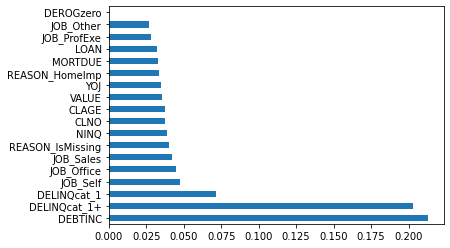

In [10]:
#Feature Importance XGBoost

print(gs_xgb.best_estimator_.feature_importances_) #new code
feat_importances = pd.Series(gs_xgb.best_estimator_.feature_importances_, index= X_var_labels)
feat_importances.nlargest(20).plot(kind='barh')


[0.0902289  0.08978227 0.08671434 0.0672937  0.09718999 0.04391778
 0.0855912  0.29572868 0.         0.01364018 0.00678914 0.01219461
 0.01220467 0.0097716  0.00525661 0.00552412 0.02104319 0.05712902]


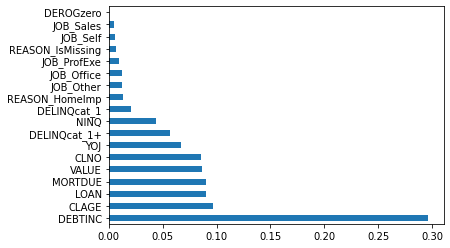

In [11]:
#Feature Importance RF

print(rf.feature_importances_) #new code
feat_importances = pd.Series(rf.feature_importances_, index= X_var_labels)
feat_importances.nlargest(20).plot(kind='barh')



### Permutation-based feature importance

Permutation-based feature importance is a learner-agnostic way to judge the relevance of features. It produces an ordinal feature ranking. In order to do this, we permute one variable by shuffling its values across all observations. This means, each observation will receive a new value. This permutation breaks the relationship to the target variable. Then we make an assumption: the higher the increase of the error due to the permutation, the more important this variable was in building the model. This way we can compute a ranking. 

Let's give it a try using our Random Forest model.

In [12]:
plt.rcParams['figure.figsize'] = 20, 10

# Permutation-based feature importance
print('Computing permutation-based feature importance...')
from sklearn.inspection import permutation_importance

classifier = gs_xgb.best_estimator_

perm_imp = permutation_importance(classifier, X_test, y_test, scoring='roc_auc', random_state=123)
sorted_idx = perm_imp.importances_mean.argsort()

Computing permutation-based feature importance...


In [13]:
X_test

array([[-0.4163406619728061, 0.7016259532005801, 0.5260996710064589, ...,
        0, 0, 0],
       [2.5452487001389033, 0.9135760901919464, 1.5070167791042208, ...,
        0, 1, 0],
       [-0.7622197115624948, 0.5443173972544961, 0.2355837580795477, ...,
        0, 0, 0],
       ...,
       [-0.2758272980769951, -0.32504379580743525, -0.3920659998990902,
        ..., 0, 0, 0],
       [1.6697423558650035, -0.4770129726179207, -0.7209638598464811,
        ..., 0, 0, 0],
       [0.21056511540850456, -0.6889631096092871, -0.6312705974088522,
        ..., 0, 0, 0]], dtype=object)

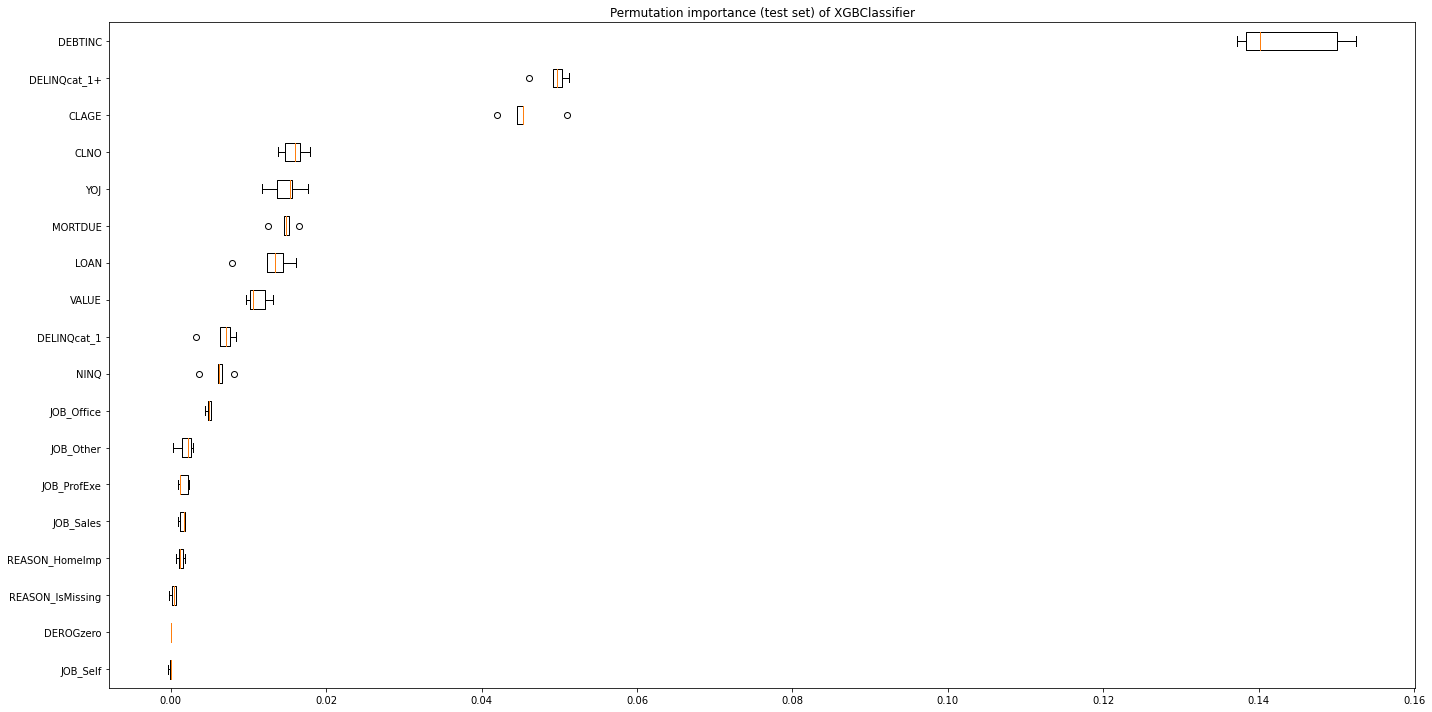

In [14]:
fig, ax = plt.subplots()
ax.boxplot(perm_imp.importances[sorted_idx].T,
           vert=False, labels=X_var_labels[sorted_idx])
ax.set_title("Permutation importance (test set) of {}".format(str(classifier)[0:str(classifier).find('(')]))
fig.tight_layout()
plt.show()

The result agrees with domain knowledge. The debt-to-income ratio proves very important. RF devotes much attention to this feature so that permuting it increases the prediction error. High importance of the number of delinquent credit lines (DELINQ) also makes sense. For CLAGE, the age of the oldest credit line in months it is maybe less obvious how it affects the target. Specifically, it would be useful to check whether high/lower values in this feature are associated with higher/lower default probability. We do not get such insight from permutation-based feature importance analysis. But partial-dependence should give as an answer.

### Partial dependence plot (PDP)
A PDP shows what type of effect a feature has on predicted probabilities. A PDP plots the values of a chosen variable (on the x-axis) against model-estimated probabilities (on the y-axis) whilst according for the combined effect of all other features. 

Computing partial dependence plots...


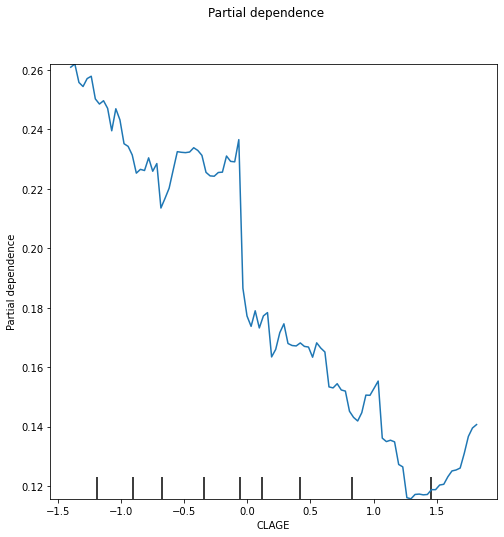

In [15]:
plt.rcParams['figure.figsize'] = 8,8
# Partial dependence
from sklearn.inspection import plot_partial_dependence
classifier = gs_xgb.best_estimator_
print('Computing partial dependence plots...')



plot_partial_dependence(classifier, X_train, features=['CLAGE'], feature_names=X_var_labels)

fig = plt.gcf()
fig.suptitle('Partial dependence')
fig.subplots_adjust(wspace=0.4, hspace=0.3)
plt.show()

Coming back to the question how CLAGE affects the PD estimates, we now have a clear answer. Higher values decrease PDs. That makes sense because high values indicate that a client has been with the bank for a longer time. We would expect such customers to be less likely to default compared to newer customers. 

As a cautionary remark, always make sure to know what exactly the y-axis is showing, the probability of being a good or a bad customer. In a binary classification setting, scikit-learn considers the class with the higher value the positive class.

## SHAP

In [16]:
# Shap 

!pip install shap
import shap


In [17]:
# Shap values for all obversations in one plot
explainer_rf = shap.TreeExplainer(rf)

shap_values_rf = explainer_rf.shap_values(X_test)

shap.initjs()
shap.force_plot(explainer_rf.expected_value[1], shap_values_rf[1], X_test, feature_names=X_var_labels)

In [18]:
# Repeat for Grid-Search XGBoost and compare
explainer_xgb = shap.TreeExplainer(gs_xgb.best_estimator_)

shap_values_xgb = explainer_xgb.shap_values(X_test)

shap.initjs()
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb, X_test, feature_names= X_var_labels)

In [19]:
# For a single observation (local)

row_to_explain = 5 #pick an observation of choice here (local)
observation = X_test[row_to_explain]  
observation_array = observation.reshape(1, -1)
print(observation_array) 


[[-0.8919243551586279 -0.6157497750488795 -0.5592903440312329
  0.05104374684992154 0.8227104545551588 -0.06505446090435664
  0.8659973675484497 0.11597123527611584 True 1 0 1 0 0 0 0 1 0]]


In [20]:
# Random Forest

shap_values_rf_single = explainer_rf.shap_values(observation_array)
shap.initjs()
shap.force_plot(explainer_rf.expected_value[0], shap_values_rf_single[0], observation, feature_names=X_var_labels)

In [21]:
# XGBoost

shap_values_xgb_single = explainer_xgb.shap_values(observation_array)
shap.initjs()
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb_single, observation, feature_names=X_var_labels)

### Summary Plots


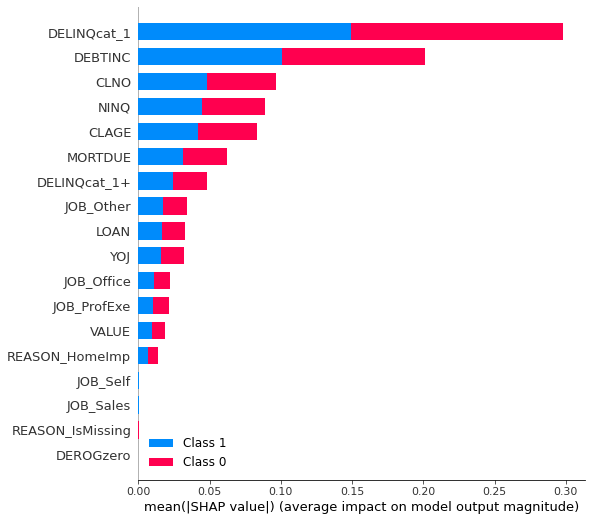

In [22]:
# Make plot for Single Observation of Random Forest
shap.summary_plot(shap_values_rf_single, observation_array, feature_names= X_var_labels)


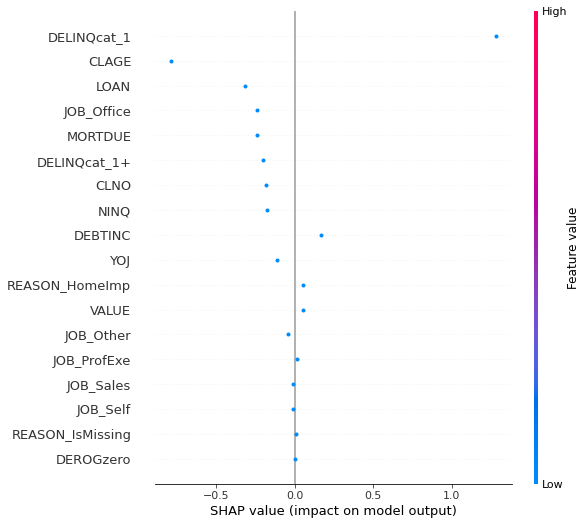

In [23]:
# for XGB

shap.summary_plot(shap_values_xgb_single, observation_array, feature_names=X_var_labels)

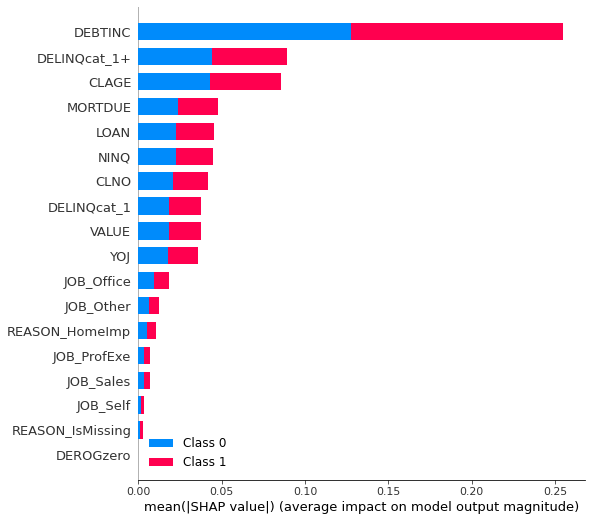

In [24]:
# for whole RF not single obsrvation
shap.summary_plot(shap_values_rf, X_test, feature_names=X_var_labels)

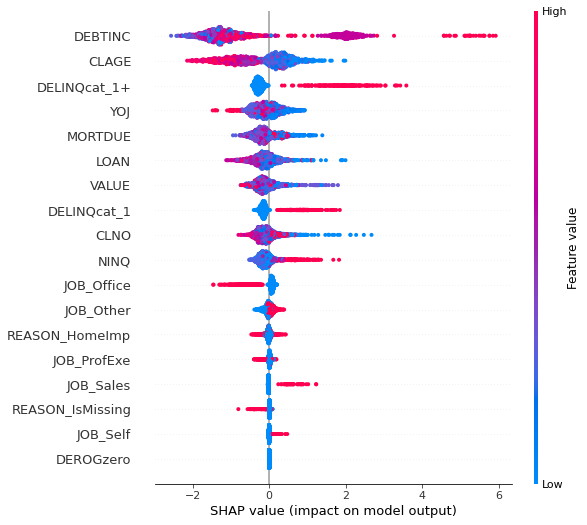

In [25]:
# for whole XGB not single obsrvation
shap.summary_plot(shap_values_xgb, X_test, feature_names=X_var_labels)

## LIME
- Have this part before Shap
- Some comments on the installation. 
- Some comments on what LIME does in general
  - Pseudo code of the algorithm
  - References to the paper

In [6]:
# Install and load LIME package (you need to do this only once)
!pip install lime

In [6]:
#import lime
from lime.lime_tabular import LimeTabularExplainer

In [96]:
class_labels = ['Good', 'Bad']  # class labels in plain English (for better readability)
cat_features = np.arange(8, X_test.shape[1])  # LIME needs to know which features are categories

# Create LIME explanation object for tab data
lime_explainer = LimeTabularExplainer(X_train, feature_names=list(X_var_labels), mode="classification", 
                                      class_names=class_labels, categorical_features=cat_features,
                                      verbose=True
                                     )

Remember to discuss `categorical_features=np.arange(8, X_test.shape[1])`

In [101]:
row_to_explain = 0  # select the data item for which we seek an explanation
k = 5  # select the number of features
pred_fun = rf.predict_proba  # function which LIME can use to predict the synthetic data items

In [102]:
idx = y_test[row_to_explain].astype(int)  # get the label of the test instace's class in the form of an index (e.g., zero for good and one for bad)
print("The true class label of test set instance {} is: {}".format(row_to_explain, class_labels[idx]))
print("Black-box model prediction p(BAD|x): {}".format(rf.predict_proba(X_test[row_to_explain].reshape(1,-1)).ravel()[1]))

The true class label of test set instance 0 is: Bad
Black-box model prediction p(BAD|x): 0.775


In [103]:
# Examine the data corresponding to the selected instance
pd.DataFrame(X_test[row_to_explain], index=X_var_labels, columns=["Feature value"])

Feature value
LOAN                 -0.546045
MORTDUE                1.17474
VALUE                  0.89356
YOJ                  -0.380444
CLAGE                -0.511524
NINQ                   1.45842
CLNO                   2.32634
DEBTINC               0.137456
DEROGzero                 True
REASON_HomeImp               0
REASON_IsMissing             1
JOB_Office                   0
JOB_Other                    0
JOB_ProfExe                  0
JOB_Sales                    0
JOB_Self                     0
DELINQcat_1                  0
DELINQcat_1+                 1

In [117]:
# Call the explanation function
exp_rf = lime_explainer.explain_instance(data_row=X_test[row_to_explain], predict_fn=pred_fun, num_features=k)

Intercept 0.2633564732348731
Prediction_local [0.55466664]
Right: 0.775


### todo
- Explain the above output
- move on with examining internal results

Reference to LIME source code:

*from lime_tabular.py line455f*<br>

`for label in labels:
            (ret_exp.intercept[label],
             ret_exp.local_exp[label],
             ret_exp.score[label],
             ret_exp.local_pred[label]) = self.base.explain_instance_with_data(
                    scaled_data,
                    yss,
                    distances,
                    label,
                    num_features,
                    model_regressor=model_regressor,
                    feature_selection=self.feature_selection)`
<br>*from lime_base (end of the file)*<br>
`return (easy_model.intercept_,
                sorted(zip(used_features, easy_model.coef_),
                       key=lambda x: np.abs(x[1]), reverse=True),
                prediction_score, local_pred)`

In [118]:
exp_rf.local_exp

{1: [(17, 0.26532156065994317),
  (5, 0.12255032922467744),
  (16, -0.10857531780639),
  (1, 0.04287086995810496),
  (7, -0.03085727466786701)]}

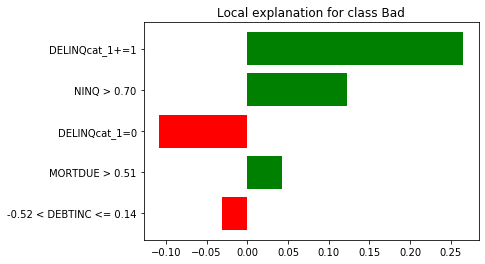

In [119]:
exp_rf.as_pyplot_figure();

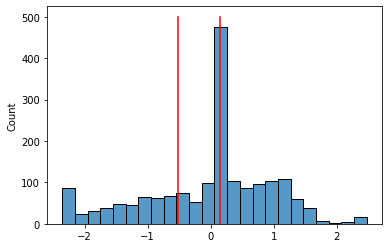

In [158]:
import seaborn as sns
sns.histplot(X_test[:,X_var_labels=='DEBTINC'], legend=False);
data = X_test[:,X_var_labels=='DEBTINC']
#plt.hist(data)
plt.plot([-0.52, -0.52],[0, 500], 'r');
plt.plot([0.14, 0.14],[0, 500], 'r');

In [ ]:
sns.histplot()

### todo
- discuss picture
- highlight that we see w, which also follows from the code snipped `sorted(zip(used_features, easy_model.coef_)`
- discuss how LIME creates dummy variables

In [81]:
exp_rf_df = pd.DataFrame(exp_rf.as_list())
exp_rf_df

0         1
0           DELINQcat_1+=1  0.264467
1              NINQ > 0.70  0.120429
2            DELINQcat_1=0 -0.117868
3              JOB_Sales=0 -0.081318
4           MORTDUE > 0.51  0.036187
5  -0.52 < DEBTINC <= 0.14 -0.024796

### todo replicate prediction
discuss why this is useful, maybe refer to analytics vidhya link, emphasize that the replication works because LIME discretizes numeric variables by default. As a consequence, in the above result, $\beta$ and $X^{\top}_i \beta$ are equivalent. 

In [86]:
# replicate the prediction of the local explanation model
print('Local model prediction is {}'.format(exp_rf.local_pred)) 
print('Local model intercept is {}'.format(exp_rf.intercept))
print('Xb is {}'.format(exp_rf_df[1].sum()))

# substracting the local model prediction and the replicated prediction should give zero
replicate_prediction = exp_rf_df[1].sum() + exp_rf.intercept[1] - exp_rf.local_pred[0]
# see eg https://medium.com/analytics-vidhya/explain-your-model-with-lime-5a1a5867b423

print("Result of the substraction: {}".format(replicate_prediction))


Local model prediction is [0.54797573]
Local model intercept is {1: 0.3508744162649087}
Xb is 0.19710131714143247
Result of the substraction: 0.0


### Second explainer for debugging

Intercept 0.24638309135884245
Prediction_local [0.50172137]
Right: 0.775


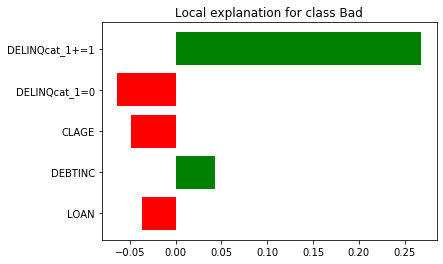

In [168]:
# Create LIME explanation object for tab data
test_explainer = LimeTabularExplainer(X_train, feature_names=list(X_var_labels), mode="classification", 
                                      class_names=class_labels, categorical_features=cat_features, 
                                      discretize_continuous=False,
                                      verbose=True
                                     )
# Call the explanation function
exp_test = test_explainer.explain_instance(data_row=X_test[row_to_explain], predict_fn=pred_fun, num_features=k)
exp_test.as_pyplot_figure();

In [256]:
# get the lables of the continuous features
exp_test_df = pd.DataFrame(exp_test.as_list())
real_feat_names = [n for n in exp_test_df[0] if n in X_var_labels]

xb = 0
# loop through explanation results
for idx, item in exp_test_df.iterrows():
    # Check if the current row refers to a discretized variable or a real variable
    if item[0] in X_var_labels:
        # Calculate b * x
        xb += item[1] * X_test[row_to_explain][X_var_labels==item[0]][0]
    else:
        # Just add the local model coefficient weight
        xb += item[1]

In [261]:
# Check whether we can now reproduce the prediction of the local model.
# You should obtain a result of zero or close to zero (due to numeric inaccuracies)
xb + exp_test.intercept[1] - exp_test.local_pred

array([-9.72995346e-05])

### Show maybe nicer output

In [262]:
exp_rf.show_in_notebook(show_table=True, show_all=False, show_predicted_value= True)

### Wrap up
- mention submodular pick
  - refer to paper
  - link to [blog](https://towardsdatascience.com/decrypting-your-machine-learning-model-using-lime-5adc035109b5) for an example how to use the code